In [1]:
%load_ext autoreload
%autoreload 2

import cPickle as pickle
import os; import sys; sys.path.append('..')
import gp
import gp.nets as nets

from nolearn.lasagne.visualize import plot_loss
from nolearn.lasagne.visualize import plot_conv_weights
from nolearn.lasagne.visualize import plot_conv_activity
from nolearn.lasagne.visualize import plot_occlusion

from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, precision_recall_fscore_support, f1_score, precision_recall_curve, average_precision_score, zero_one_loss


from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

%matplotlib inline

/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using gpu device 0: GeForce GTX TITAN (CNMeM is disabled, CuDNN 4007)
/home/d/nolearn/local/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [39]:
%reload_ext autoreload

In [2]:
import nolearn.lasagne.visualize 

In [2]:
NETS = []
NETS.append('../nets/IP_FULL.p') # image + prob
NETS.append('../nets/IPLB_FULL.p') # image + large border
NETS.append('../nets/IPM_FULL.p') # image + prob + binary
NETS.append('../nets/IPMB_FULL.p') # image + prob + binary + border
NETS.append('../nets/IPMLB_FULL.p') # image + prob + binary + large border

network_path = NETS[-1]

with open(network_path, 'rb') as f:
    net = pickle.load(f)

In [3]:
net.train_history_[-52]

{'dur': 88.82897090911865,
 'epoch': 261,
 'train_loss': 0.10699970212163648,
 'train_loss_best': False,
 'valid_accuracy': 0.96897836112096492,
 'valid_loss': 0.084532429298247877,
 'valid_loss_best': True}

In [4]:
train_losses = []
valid_losses = []
for h in net.train_history_:
    train_losses.append(h['train_loss'])
    valid_losses.append(h['valid_loss'])
    

In [22]:
aaa = '''
Merging for sureness s= 1.0
merging 56 92
recomputed 82 patches
merged 82 patches into 53
New VI 0.817495412153
--------------------------------------------------------------------------------
Merging for sureness s= 1.0
merging 93 94
recomputed 23 patches
merged 23 patches into 19
New VI 0.817496076009
--------------------------------------------------------------------------------
Merging for sureness s= 1.0
merging 125 145
recomputed 46 patches
merged 46 patches into 33
New VI 0.817345725205
--------------------------------------------------------------------------------
Merging for sureness s= 1.0
merging 224 228
recomputed 29 patches
merged 29 patches into 22
New VI 0.816164002404
--------------------------------------------------------------------------------
Merging for sureness s= 1.0
merging 315 318
recomputed 60 patches
merged 60 patches into 41
New VI 0.815224805783
--------------------------------------------------------------------------------
Merging for sureness s= 0.999999344349
merging 66 133
recomputed 57 patches
merged 57 patches into 36
New VI 0.810386772272
--------------------------------------------------------------------------------
Merging for sureness s= 0.999994635582
merging 209 225
recomputed 108 patches
merged 108 patches into 93
New VI 0.810291085346
--------------------------------------------------------------------------------
Merging for sureness s= 0.999992251396
merging 67 92
recomputed 24 patches
merged 24 patches into 19
New VI 0.809773543923
--------------------------------------------------------------------------------
Merging for sureness s= 0.999952197075
merging 172 173
recomputed 33 patches
merged 33 patches into 24
New VI 0.809504817838
--------------------------------------------------------------------------------
Merging for sureness s= 0.999943912029
merging 329 339
recomputed 81 patches
merged 81 patches into 49
New VI 0.80816184235
--------------------------------------------------------------------------------
Merging for sureness s= 0.999909520149
merging 303 317
recomputed 35 patches
merged 35 patches into 26
New VI 0.807793095247
--------------------------------------------------------------------------------
Merging for sureness s= 0.999903678894
merging 165 167
recomputed 63 patches
merged 63 patches into 56
New VI 0.807625196272
--------------------------------------------------------------------------------
Merging for sureness s= 0.999897122383
merging 255 259
recomputed 57 patches
merged 57 patches into 42
New VI 0.807245717265
--------------------------------------------------------------------------------
Merging for sureness s= 0.999696552753
merging 140 198
recomputed 286 patches
merged 286 patches into 196
New VI 0.807261826022
--------------------------------------------------------------------------------
Merging for sureness s= 0.99965184927
merging 151 157
recomputed 41 patches
merged 41 patches into 29
New VI 0.807392229447
--------------------------------------------------------------------------------
Merging for sureness s= 0.998836219311
merging 25 42
recomputed 28 patches
merged 28 patches into 24
New VI 0.806641613873
--------------------------------------------------------------------------------
Merging for sureness s= 0.995340824127
merging 261 328
recomputed 117 patches
merged 117 patches into 75
New VI 0.806116165679
--------------------------------------------------------------------------------
Merging for sureness s= 0.988346070051
merging 313 318
recomputed 25 patches
merged 25 patches into 23
New VI 0.804934332616
--------------------------------------------------------------------------------
Merging for sureness s= 0.983582258224
merging 158 161
recomputed 32 patches
merged 32 patches into 25
New VI 0.80493479166
--------------------------------------------------------------------------------
Merging for sureness s= 0.978759109974
merging 299 310
recomputed 21 patches
merged 21 patches into 16
New VI 0.804850008339
--------------------------------------------------------------------------------
Merging for sureness s= 0.993987798691
merging 295 352
recomputed 44 patches
merged 44 patches into 27
New VI 0.804271064308
--------------------------------------------------------------------------------
Merging for sureness s= 0.976170569658
merging 111 133
recomputed 16 patches
merged 16 patches into 14
New VI 0.802387523362
--------------------------------------------------------------------------------
Merging for sureness s= 0.973912596703
merging 310 312
recomputed 20 patches
merged 20 patches into 14
New VI 0.802078369808
--------------------------------------------------------------------------------
Merging for sureness s= 0.970521509647
merging 286 312
recomputed 31 patches
merged 31 patches into 20
New VI 0.80121195831
--------------------------------------------------------------------------------
Merging for sureness s= 0.966457128525
merging 322 355
recomputed 32 patches
merged 32 patches into 25
New VI 0.801159926745
--------------------------------------------------------------------------------
Merging for sureness s= 0.958226561546
merging 73 81
recomputed 49 patches
merged 49 patches into 36
New VI 0.800517738251
--------------------------------------------------------------------------------
Merging for sureness s= 0.934277951717
merging 181 182
recomputed 63 patches
merged 63 patches into 43
New VI 0.800702906179
--------------------------------------------------------------------------------
Merging for sureness s= 0.932888269424
merging 323 327
recomputed 30 patches
merged 30 patches into 23
New VI 0.800439730222
--------------------------------------------------------------------------------
Merging for sureness s= 0.914203584194
merging 191 193
recomputed 65 patches
merged 65 patches into 48
New VI 0.799888828947
--------------------------------------------------------------------------------
Merging for sureness s= 0.912452340126
merging 208 212
recomputed 45 patches
merged 45 patches into 34
New VI 0.79978407613
--------------------------------------------------------------------------------
Merging for sureness s= 0.90297421813
merging 327 328
recomputed 37 patches
merged 37 patches into 26
New VI 0.79919900934
--------------------------------------------------------------------------------
Merging for sureness s= 0.901962429285
merging 207 218
recomputed 56 patches
merged 56 patches into 50
New VI 0.798932407801
--------------------------------------------------------------------------------
Merging for sureness s= 0.899576753378
merging 15 150
recomputed 341 patches
merged 341 patches into 218
New VI 0.803526469385
--------------------------------------------------------------------------------
Merging for sureness s= 0.91595518589
merging 232 233
recomputed 27 patches
merged 27 patches into 17
New VI 0.8023368684
--------------------------------------------------------------------------------
Merging for sureness s= 0.876506894827
merging 206 218
recomputed 64 patches
merged 64 patches into 55
New VI 0.801709608912
--------------------------------------------------------------------------------
Merging for sureness s= 0.963925123215
merging 211 218
recomputed 57 patches
merged 57 patches into 40
New VI 0.804074938586
--------------------------------------------------------------------------------
Merging for sureness s= 0.863917529583
merging 148 149
recomputed 102 patches
merged 102 patches into 89
New VI 0.803797318673
--------------------------------------------------------------------------------
Merging for sureness s= 0.857988655567
merging 312 352
recomputed 25 patches
merged 25 patches into 17
New VI 0.808588417199
--------------------------------------------------------------------------------
Merging for sureness s= 0.8562541008
merging 167 170
recomputed 72 patches
merged 72 patches into 61
New VI 0.807887142001
--------------------------------------------------------------------------------
Merging for sureness s= 0.827654421329
merging 100 106
recomputed 29 patches
merged 29 patches into 24
New VI 0.804969089413
--------------------------------------------------------------------------------
Merging for sureness s= 0.811664581299
merging 69 78
recomputed 67 patches
merged 67 patches into 56
New VI 0.805354670603
--------------------------------------------------------------------------------
Merging for sureness s= 0.804179370403
merging 104 133
recomputed 84 patches
merged 84 patches into 67
New VI 0.823654087254
--------------------------------------------------------------------------------
Merging for sureness s= 0.952828615904
merging 133 134
recomputed 110 patches
merged 110 patches into 80
New VI 0.821376001769
--------------------------------------------------------------------------------
Merging for sureness s= 0.788728962545
merging 71 92
recomputed 30 patches
merged 30 patches into 24
New VI 0.822331558978
--------------------------------------------------------------------------------
Merging for sureness s= 0.778571337461
merging 331 333
recomputed 31 patches
merged 31 patches into 23
New VI 0.82135711712
--------------------------------------------------------------------------------
Merging for sureness s= 0.758813977242
merging 213 225
recomputed 48 patches
merged 48 patches into 42
New VI 0.82241327525
--------------------------------------------------------------------------------
Merging for sureness s= 0.703884691
merging 243 245
recomputed 36 patches
merged 36 patches into 30
New VI 0.822504403942
--------------------------------------------------------------------------------
Merging for sureness s= 0.648061752319
merging 146 153
recomputed 49 patches
merged 49 patches into 44
New VI 0.821294228085
--------------------------------------------------------------------------------
Merging for sureness s= 0.774893343449
merging 153 198
recomputed 74 patches
merged 74 patches into 59
New VI 0.827492814012
--------------------------------------------------------------------------------
Merging for sureness s= 0.646556317806
merging 270 290
recomputed 54 patches
merged 54 patches into 38
New VI 0.825253403526
--------------------------------------------------------------------------------
Merging for sureness s= 0.631325796247
merging 55 134
recomputed 29 patches
merged 29 patches into 22
New VI 0.831569005929
--------------------------------------------------------------------------------
Merging for sureness s= 0.615505039692
merging 221 228
recomputed 50 patches
merged 50 patches into 44
New VI 0.830876774694
--------------------------------------------------------------------------------
Merging for sureness s= 0.565684631467
merging 227 233
recomputed 69 patches
merged 69 patches into 57
New VI 0.828679256214
--------------------------------------------------------------------------------
Merging for sureness s= 0.562470242381
merging 217 219
recomputed 35 patches
merged 35 patches into 27
New VI 0.828608363414
--------------------------------------------------------------------------------
Merging for sureness s= 0.53288730979
merging 193 204
recomputed 58 patches
merged 58 patches into 44
New VI 0.827799443801
--------------------------------------------------------------------------------
Merging for sureness s= 0.511310621878
merging 333 339
recomputed 23 patches
merged 23 patches into 21
New VI 0.823267001711
--------------------------------------------------------------------------------
Merging for sureness s= 0.5094627738
merging 332 344
recomputed 26 patches
merged 26 patches into 19
New VI 0.822390767251
--------------------------------------------------------------------------------
Merging for sureness s= 0.462960451841
merging 170 188
recomputed 75 patches
merged 75 patches into 59
New VI 0.823369878152
--------------------------------------------------------------------------------
Merging for sureness s= 0.41217439808
merging 195 204
recomputed 50 patches
merged 50 patches into 39
New VI 0.827189516444
--------------------------------------------------------------------------------
Merging for sureness s= 0.399323612452
merging 168 198
recomputed 57 patches
merged 57 patches into 48
New VI 0.827222396208
--------------------------------------------------------------------------------
Merging for sureness s= 0.965307295322
merging 176 198
recomputed 39 patches
merged 39 patches into 37
New VI 0.827092241514
--------------------------------------------------------------------------------
Merging for sureness s= 0.317683875561
merging 245 252
recomputed 42 patches
merged 42 patches into 34
New VI 0.827159366632
--------------------------------------------------------------------------------
Merging for sureness s= 0.258379161358
merging 106 108
recomputed 108 patches
merged 108 patches into 77
New VI 0.833153247033
--------------------------------------------------------------------------------
Merging for sureness s= 0.256100773811
merging 294 302
recomputed 44 patches
merged 44 patches into 33
New VI 0.832197862814
--------------------------------------------------------------------------------
Merging for sureness s= 0.235801130533
merging 317 355
recomputed 27 patches
merged 27 patches into 22
New VI 0.830270649726
--------------------------------------------------------------------------------
Merging for sureness s= 0.17696859315
merging 285 352
recomputed 16 patches
merged 16 patches into 13
New VI 0.830295609979
--------------------------------------------------------------------------------
Merging for sureness s= 0.168595004827
merging 53 57
recomputed 55 patches
merged 55 patches into 46
New VI 0.830523710484
--------------------------------------------------------------------------------
Merging for sureness s= 0.161973327398
merging 108 115
recomputed 119 patches
merged 119 patches into 84
New VI 0.829930003458
--------------------------------------------------------------------------------
Merging for sureness s= 0.156564950943
merging 131 135
recomputed 26 patches
merged 26 patches into 21
New VI 0.829976519106
--------------------------------------------------------------------------------
Merging for sureness s= 0.177695065737
merging 112 198
recomputed 122 patches
merged 122 patches into 95
New VI 0.852751152712
--------------------------------------------------------------------------------
Merging for sureness s= 0.155232107267
merging 325 352
recomputed 10 patches
merged 10 patches into 6
New VI 0.869090723242
--------------------------------------------------------------------------------
Merging for sureness s= 0.823845451111
merging 335 352
recomputed 4 patches
merged 4 patches into 4
New VI 0.865864846562
--------------------------------------------------------------------------------
Merging for sureness s= 0.669058918953
merging 288 352
recomputed 9 patches
merged 9 patches into 8
New VI 0.882990521678
--------------------------------------------------------------------------------
Merging for sureness s= 0.671704083681
merging 244 352
recomputed 50 patches
merged 50 patches into 41
New VI 0.91963623786
--------------------------------------------------------------------------------
Merging for sureness s= 0.14671741426
merging 60 64
recomputed 27 patches
merged 27 patches into 22
New VI 0.920280101353
--------------------------------------------------------------------------------
Merging for sureness s= 0.146454326808
merging 115 128
recomputed 120 patches
merged 120 patches into 84
New VI 0.91636859827
--------------------------------------------------------------------------------
Merging for sureness s= 0.145761862397
merging 228 246
recomputed 76 patches
merged 76 patches into 62
New VI 0.915755789875
--------------------------------------------------------------------------------
Merging for sureness s= 0.145067587495
merging 134 150
recomputed 108 patches
merged 108 patches into 76
New VI 1.02106859812
--------------------------------------------------------------------------------
Merging for sureness s= 0.143466724548
merging 17 92
recomputed 60 patches
merged 60 patches into 41
New VI 1.03581159025
--------------------------------------------------------------------------------
Merging for sureness s= 0.140742719173
merging 268 275
recomputed 55 patches
merged 55 patches into 46
New VI 1.03561717624
--------------------------------------------------------------------------------
Merging for sureness s= 0.136649698019
merging 274 352
recomputed 21 patches
merged 21 patches into 18
New VI 1.0419603801
--------------------------------------------------------------------------------
Merging for sureness s= 0.107465045527
merging 247 260
recomputed 62 patches
merged 62 patches into 46
New VI 1.04127446266
--------------------------------------------------------------------------------
Merging for sureness s= 0.669788986444
merging 203 260
recomputed 114 patches
merged 114 patches into 87
New VI 1.03915038549
--------------------------------------------------------------------------------
Merging for sureness s= 0.257672440261
merging 233 240
recomputed 79 patches
merged 79 patches into 58
New VI 1.03834048758
--------------------------------------------------------------------------------
Merging for sureness s= 0.444870602149
merging 240 260
recomputed 69 patches
merged 69 patches into 53
New VI 1.04735341049
--------------------------------------------------------------------------------
Merging for sureness s= 0.979742306609
merging 236 260
recomputed 4 patches
merged 4 patches into 4
New VI 1.04639257591
--------------------------------------------------------------------------------
Merging for sureness s= 0.098797980696
merging 218 246
recomputed 78 patches
merged 78 patches into 59
New VI 1.05041536351
--------------------------------------------------------------------------------
Merging for sureness s= 0.0927484259009
merging 103 150
recomputed 70 patches
merged 70 patches into 56
New VI 1.04958100846
--------------------------------------------------------------------------------
Merging for sureness s= 0.0920103862882
merging 149 150
recomputed 98 patches
merged 98 patches into 79
New VI 1.06635072802
--------------------------------------------------------------------------------
Merging for sureness s= 0.705207914114
merging 150 159
recomputed 299 patches
merged 299 patches into 172
New VI 1.07268386429
--------------------------------------------------------------------------------
Merging for sureness s= 0.92209482193
merging 159 166
recomputed 293 patches
merged 293 patches into 168
New VI 1.10138602184
--------------------------------------------------------------------------------
Merging for sureness s= 0.961541742086
merging 163 166
recomputed 62 patches
merged 62 patches into 50
New VI 1.10290143282
--------------------------------------------------------------------------------
Merging for sureness s= 0.485236719251
merging 78 87
recomputed 97 patches
merged 97 patches into 70
New VI 1.10445155426
--------------------------------------------------------------------------------
Merging for sureness s= 0.829479753971
merging 87 91
recomputed 95 patches
merged 95 patches into 69
New VI 1.10365196592
--------------------------------------------------------------------------------
Merging for sureness s= 0.999365538359
merging 91 96
recomputed 89 patches
merged 89 patches into 66
New VI 1.11033269279
--------------------------------------------------------------------------------
Merging for sureness s= 0.493395937607
merging 68 85
recomputed 82 patches
merged 82 patches into 63
New VI 1.11007618404
--------------------------------------------------------------------------------
Merging for sureness s= 0.122416111641
merging 85 96
recomputed 76 patches
merged 76 patches into 60
New VI 1.10979814197
--------------------------------------------------------------------------------
Merging for sureness s= 0.120308451355
merging 225 234
recomputed 96 patches
merged 96 patches into 73
New VI 1.10903647273
--------------------------------------------------------------------------------
Merging for sureness s= 0.0915633067489
merging 81 82
recomputed 53 patches
merged 53 patches into 37
New VI 1.10832002606
--------------------------------------------------------------------------------
Merging for sureness s= 0.0882264906541
merging 320 326
recomputed 24 patches
merged 24 patches into 19
New VI 1.10820729016
--------------------------------------------------------------------------------
Merging for sureness s= 0.0809442996979
merging 142 152
recomputed 46 patches
merged 46 patches into 34
New VI 1.11247123357
--------------------------------------------------------------------------------
Merging for sureness s= 0.204888179898
merging 169 182
recomputed 35 patches
merged 35 patches into 28
New VI 1.11211664067
--------------------------------------------------------------------------------
Merging for sureness s= 0.077476888895
merging 345 355
recomputed 35 patches
merged 35 patches into 27
New VI 1.11773634762
--------------------------------------------------------------------------------
Merging for sureness s= 0.0657697943971
merging 34 42
recomputed 73 patches
merged 73 patches into 54
New VI 1.11456329108
--------------------------------------------------------------------------------
Merging for sureness s= 0.0653259469982
merging 43 44
recomputed 13 patches
merged 13 patches into 11
New VI 1.11428757963
--------------------------------------------------------------------------------
Merging for sureness s= 0.065198071301
merging 258 259
recomputed 24 patches
merged 24 patches into 19
New VI 1.11439789919
--------------------------------------------------------------------------------
Merging for sureness s= 0.060552302748
merging 283 355
recomputed 34 patches
merged 34 patches into 26
New VI 1.11313575125
--------------------------------------------------------------------------------
Merging for sureness s= 0.0973333884031
merging 276 355
recomputed 48 patches
merged 48 patches into 34
New VI 1.12265676179
--------------------------------------------------------------------------------
Merging for sureness s= 0.0594632448629
merging 127 141
recomputed 52 patches
merged 52 patches into 43
New VI 1.12110309514
--------------------------------------------------------------------------------
Merging for sureness s= 0.053269892931
merging 90 128
recomputed 33 patches
merged 33 patches into 26
New VI 1.12518941685
--------------------------------------------------------------------------------
Merging for sureness s= 0.521639868617
merging 88 128
recomputed 43 patches
merged 43 patches into 32
New VI 1.1308750279
--------------------------------------------------------------------------------
Merging for sureness s= 0.0505615472794
merging 239 260
recomputed 56 patches
merged 56 patches into 45
New VI 1.12963248712
--------------------------------------------------------------------------------
Merging for sureness s= 0.0481745861471
merging 128 138
recomputed 116 patches
merged 116 patches into 80
New VI 1.13990205528
--------------------------------------------------------------------------------
Merging for sureness s= 0.0433349367231
merging 33 38
recomputed 92 patches
merged 92 patches into 66
New VI 1.14316340028
--------------------------------------------------------------------------------
Merging for sureness s= 0.0341779179871
merging 186 246
recomputed 64 patches
merged 64 patches into 45
New VI 1.15271915252
--------------------------------------------------------------------------------
Merging for sureness s= 0.513902783394
merging 246 252
recomputed 114 patches
merged 114 patches into 81
New VI 1.1548299808
--------------------------------------------------------------------------------
Merging for sureness s= 0.169396683574
merging 237 252
recomputed 54 patches
merged 54 patches into 42
New VI 1.16608462875
--------------------------------------------------------------------------------
Merging for sureness s= 0.0575409540907
merging 185 212
recomputed 65 patches
merged 65 patches into 49
New VI 1.16688025456
--------------------------------------------------------------------------------
Merging for sureness s= 0.0334143415093
merging 64 92
recomputed 32 patches
merged 32 patches into 24
New VI 1.17296865633
--------------------------------------------------------------------------------
Merging for sureness s= 0.219674466178
merging 77 92
recomputed 85 patches
merged 85 patches into 64
New VI 1.18816776242
--------------------------------------------------------------------------------
Merging for sureness s= 0.051537184976
merging 92 97
recomputed 125 patches
merged 125 patches into 83
New VI 1.1927351269
--------------------------------------------------------------------------------
Merging for sureness s= 0.0751153770834
merging 61 65
recomputed 32 patches
merged 32 patches into 26
New VI 1.19129248988
--------------------------------------------------------------------------------
Merging for sureness s= 0.0495965268435
merging 44 97
recomputed 78 patches
merged 78 patches into 54
New VI 1.22354082328
--------------------------------------------------------------------------------
Merging for sureness s= 0.981435853741
merging 54 97
recomputed 16 patches
merged 16 patches into 14
New VI 1.22519066173
--------------------------------------------------------------------------------
Merging for sureness s= 0.305448949337
merging 94 97
recomputed 59 patches
merged 59 patches into 49
New VI 1.2275241867
--------------------------------------------------------------------------------
Merging for sureness s= 0.0333149507642
merging 124 166
recomputed 79 patches
merged 79 patches into 60
New VI 1.24196690088
--------------------------------------------------------------------------------
Merging for sureness s= 0.0502910961593
merging 166 198
recomputed 218 patches
merged 218 patches into 129
New VI 1.38816305972
--------------------------------------------------------------------------------
Merging for sureness s= 0.689828221834
merging 119 198
recomputed 56 patches
merged 56 patches into 50
New VI 1.38985690819
--------------------------------------------------------------------------------
Merging for sureness s= 0.0397638566792
merging 144 198
recomputed 58 patches
merged 58 patches into 49
New VI 1.39212520401
--------------------------------------------------------------------------------
Merging for sureness s= 0.861248630083
merging 143 198
recomputed 54 patches
merged 54 patches into 48
New VI 1.39650878072
--------------------------------------------------------------------------------
Merging for sureness s= 0.0300494078547
merging 212 219
recomputed 63 patches
merged 63 patches into 47
New VI 1.39646042515
--------------------------------------------------------------------------------
Merging for sureness s= 0.325597021729
merging 210 219
recomputed 75 patches
merged 75 patches into 55
New VI 1.40371438038
--------------------------------------------------------------------------------
Merging for sureness s= 0.129579694131
merging 219 252
recomputed 92 patches
merged 92 patches into 64
New VI 1.43534704037
--------------------------------------------------------------------------------
Merging for sureness s= 0.980181848839
merging 231 252
recomputed 22 patches
merged 22 patches into 21
New VI 1.43684816876
--------------------------------------------------------------------------------
Merging for sureness s= 0.709030151367
merging 252 352
recomputed 191 patches
merged 191 patches into 138
New VI 1.5068488894
--------------------------------------------------------------------------------
Merging for sureness s= 0.0999199226499
merging 259 352
recomputed 48 patches
merged 48 patches into 38
New VI 1.51626529396
--------------------------------------------------------------------------------
Merging for sureness s= 0.0293469965691
merging 183 188
recomputed 62 patches
merged 62 patches into 52
New VI 1.51612711982
--------------------------------------------------------------------------------
Merging for sureness s= 0.0270073600113
merging 114 121
recomputed 67 patches
merged 67 patches into 56
New VI 1.51628265147
--------------------------------------------------------------------------------
Merging for sureness s= 0.202043088153
merging 121 198
recomputed 83 patches
merged 83 patches into 66
New VI 1.52630287626
--------------------------------------------------------------------------------
Merging for sureness s= 0.025162242353
merging 253 256
recomputed 66 patches
merged 66 patches into 56
New VI 1.52667337093
--------------------------------------------------------------------------------
Merging for sureness s= 0.0245506633073
merging 105 138
recomputed 21 patches
merged 21 patches into 17
New VI 1.52805374446
--------------------------------------------------------------------------------
Merging for sureness s= 0.0242212433368
merging 38 198
recomputed 98 patches
merged 98 patches into 72
New VI 1.57622281582
--------------------------------------------------------------------------------
Merging for sureness s= 0.022138879227
merging 156 161
recomputed 39 patches
merged 39 patches into 29
New VI 1.57660405418
--------------------------------------------------------------------------------
Merging for sureness s= 0.0221190396696
merging 95 99
recomputed 26 patches
merged 26 patches into 19
New VI 1.57710521394
--------------------------------------------------------------------------------
Merging for sureness s= 0.0217921119183
merging 70 79
recomputed 77 patches
merged 77 patches into 65
New VI 1.57724150281
--------------------------------------------------------------------------------
Merging for sureness s= 0.0185625832528
merging 157 182
recomputed 44 patches
merged 44 patches into 33
New VI 1.58043821909
--------------------------------------------------------------------------------
Merging for sureness s= 0.0178892724216
merging 248 352
recomputed 124 patches
merged 124 patches into 100
New VI 1.60545789717
--------------------------------------------------------------------------------
Merging for sureness s= 0.0177842229605
merging 291 314
recomputed 42 patches
merged 42 patches into 38
New VI 1.60980712565
--------------------------------------------------------------------------------
Merging for sureness s= 0.0212469389662
merging 314 328
recomputed 46 patches
merged 46 patches into 40
New VI 1.63438847466
--------------------------------------------------------------------------------
Merging for sureness s= 0.0521556064487
merging 328 341
recomputed 78 patches
merged 78 patches into 50
New VI 1.63560230716
--------------------------------------------------------------------------------
Merging for sureness s= 0.0171128381044
merging 63 74
recomputed 98 patches
merged 98 patches into 76
New VI 1.63479695415
--------------------------------------------------------------------------------
Merging for sureness s= 0.0127881038934
merging 135 174
recomputed 97 patches
merged 97 patches into 72
New VI 1.63502290577
--------------------------------------------------------------------------------
Merging for sureness s= 0.0117030031979
merging 204 352
recomputed 85 patches
merged 85 patches into 63
New VI 1.66943636197
--------------------------------------------------------------------------------
Merging for sureness s= 0.295977964997
merging 152 352
recomputed 88 patches
merged 88 patches into 64
New VI 1.69671147467
--------------------------------------------------------------------------------
Merging for sureness s= 0.257188727688
merging 182 352
recomputed 67 patches
merged 67 patches into 52
New VI 1.71530917606
--------------------------------------------------------------------------------
Merging for sureness s= 0.810769708455
merging 197 352
recomputed 37 patches
merged 37 patches into 35
New VI 1.71871863148
--------------------------------------------------------------------------------
Merging for sureness s= 0.792244493961
merging 171 352
recomputed 53 patches
merged 53 patches into 42
New VI 1.73258840025
--------------------------------------------------------------------------------
Merging for sureness s= 0.0195108950138
merging 132 352
recomputed 60 patches
merged 60 patches into 50
New VI 1.74611566394
--------------------------------------------------------------------------------
Merging for sureness s= 0.0112796537578
merging 62 97
recomputed 22 patches
merged 22 patches into 18
New VI 1.74927632799
--------------------------------------------------------------------------------
Merging for sureness s= 0.0111202679109
merging 201 202
recomputed 45 patches
merged 45 patches into 38
New VI 1.74912218302
--------------------------------------------------------------------------------
Merging for sureness s= 0.00989824626595
merging 229 352
recomputed 44 patches
merged 44 patches into 38
New VI 1.75378360519
--------------------------------------------------------------------------------
Merging for sureness s= 0.0721650738269
merging 222 352
recomputed 41 patches
merged 41 patches into 35
New VI 1.75677463499
--------------------------------------------------------------------------------
Merging for sureness s= 0.00948217173573
merging 293 326
recomputed 93 patches
merged 93 patches into 73
New VI 1.75512699071
--------------------------------------------------------------------------------
Merging for sureness s= 0.00902084223344
merging 76 99
recomputed 69 patches
merged 69 patches into 55
New VI 1.75387863907
--------------------------------------------------------------------------------
Merging for sureness s= 0.00727092800662
merging 154 160
recomputed 93 patches
merged 93 patches into 70
New VI 1.75398273643
--------------------------------------------------------------------------------
Merging for sureness s= 0.0541511664633
merging 160 198
recomputed 87 patches
merged 87 patches into 68
New VI 1.76527464639
--------------------------------------------------------------------------------
Merging for sureness s= 0.386811276571
merging 174 198
recomputed 76 patches
merged 76 patches into 62
New VI 1.78420368641
--------------------------------------------------------------------------------
Merging for sureness s= 0.0779839847237
merging 180 198
recomputed 98 patches
merged 98 patches into 82
New VI 1.79844640611
--------------------------------------------------------------------------------
Merging for sureness s= 0.00633549457416
merging 242 260
recomputed 59 patches
merged 59 patches into 51
New VI 1.79698328385
--------------------------------------------------------------------------------
Merging for sureness s= 0.0078352605924
merging 216 260
recomputed 59 patches
merged 59 patches into 50
New VI 1.79809087622
--------------------------------------------------------------------------------
Merging for sureness s= 0.215715326369
merging 198 260
recomputed 312 patches
merged 312 patches into 180
New VI 1.88323720079
--------------------------------------------------------------------------------
Merging for sureness s= 0.00825450976845
merging 139 260
recomputed 56 patches
merged 56 patches into 48
New VI 1.8838828531
--------------------------------------------------------------------------------
Merging for sureness s= 0.0082412911579
merging 65 74
recomputed 27 patches
merged 27 patches into 21
New VI 1.88532555561
--------------------------------------------------------------------------------
Merging for sureness s= 0.00824026350165
merging 187 196
recomputed 68 patches
merged 68 patches into 53
New VI 1.8862172932
--------------------------------------------------------------------------------
Merging for sureness s= 0.00623523723334
merging 338 344
recomputed 13 patches
merged 13 patches into 10
New VI 1.88733349144
--------------------------------------------------------------------------------
Merging for sureness s= 0.34743328765
merging 330 344
recomputed 22 patches
merged 22 patches into 16
New VI 1.88885464993
--------------------------------------------------------------------------------
Merging for sureness s= 0.0383177828044
merging 318 344
recomputed 28 patches
merged 28 patches into 24
New VI 1.88697130614
--------------------------------------------------------------------------------
Merging for sureness s= 0.539698168635
merging 307 344
recomputed 47 patches
merged 47 patches into 34
New VI 1.89867505498
--------------------------------------------------------------------------------
Merging for sureness s= 0.363075405359
merging 344 350
recomputed 70 patches
merged 70 patches into 49
New VI 1.89810519373
--------------------------------------------------------------------------------
Merging for sureness s= 0.00876338360831
merging 302 309
recomputed 39 patches
merged 39 patches into 29
New VI 1.89872389374
--------------------------------------------------------------------------------
Merging for sureness s= 0.0287724053487
merging 290 309
recomputed 78 patches
merged 78 patches into 59
New VI 1.9027287832
--------------------------------------------------------------------------------
Merging for sureness s= 0.00579501595348
merging 113 260
recomputed 63 patches
merged 63 patches into 55
New VI 1.90231412774
--------------------------------------------------------------------------------
Merging for sureness s= 0.00558064784855
merging 234 260
recomputed 58 patches
merged 58 patches into 48
New VI 1.91987975101
--------------------------------------------------------------------------------
Merging for sureness s= 0.0865166066214
merging 196 260
recomputed 57 patches
merged 57 patches into 46
New VI 1.93024809688
--------------------------------------------------------------------------------
Merging for sureness s= 0.0572286807001
merging 200 260
recomputed 51 patches
merged 51 patches into 44
New VI 1.93604500232
--------------------------------------------------------------------------------
Merging for sureness s= 0.00509684067219
merging 57 260
recomputed 62 patches
merged 62 patches into 52
New VI 1.93976035579
--------------------------------------------------------------------------------
Merging for sureness s= 0.052419077605
merging 51 260
recomputed 56 patches
merged 56 patches into 50
New VI 1.94157371891
--------------------------------------------------------------------------------
Merging for sureness s= 0.00490943482146
merging 161 260
recomputed 89 patches
merged 89 patches into 74
New VI 1.94921797304
--------------------------------------------------------------------------------
Merging for sureness s= 0.0392993269488
merging 136 260
recomputed 89 patches
merged 89 patches into 74
New VI 1.9594433972
--------------------------------------------------------------------------------
Merging for sureness s= 0.00487307459116
merging 82 89
recomputed 28 patches
merged 28 patches into 23
New VI 1.96012506704
--------------------------------------------------------------------------------
Merging for sureness s= 0.306920390576
merging 89 138
recomputed 26 patches
merged 26 patches into 21
New VI 1.96671961233
--------------------------------------------------------------------------------
Merging for sureness s= 0.998034417629
merging 74 138
recomputed 71 patches
merged 71 patches into 55
New VI 1.97517297463
--------------------------------------------------------------------------------
Merging for sureness s= 0.918484210968
merging 97 138
recomputed 79 patches
merged 79 patches into 53
New VI 2.03259529274
--------------------------------------------------------------------------------
Merging for sureness s= 0.93751180172
merging 83 138
recomputed 62 patches
merged 62 patches into 47
New VI 2.04288126451
--------------------------------------------------------------------------------
Merging for sureness s= 0.00853261724114
merging 98 138
recomputed 14 patches
merged 14 patches into 11
New VI 2.04891184553
--------------------------------------------------------------------------------
Merging for sureness s= 0.0183481732383
merging 107 138
recomputed 59 patches
merged 59 patches into 45
New VI 2.05983770391
--------------------------------------------------------------------------------
Merging for sureness s= 0.830460518599
merging 118 138
recomputed 58 patches
merged 58 patches into 42
New VI 2.06465590897
--------------------------------------------------------------------------------
Merging for sureness s= 0.00494049023837
merging 99 138
recomputed 54 patches
merged 54 patches into 41
New VI 2.06947083425
--------------------------------------------------------------------------------
Merging for sureness s= 0.00993582992086
merging 138 260
recomputed 58 patches
merged 58 patches into 37
New VI 2.28022096064
--------------------------------------------------------------------------------
Merging for sureness s= 0.847376422294
merging 72 260
recomputed 40 patches
merged 40 patches into 33
New VI 2.2884193161
--------------------------------------------------------------------------------
Merging for sureness s= 0.779279434303
merging 123 260
recomputed 38 patches
merged 38 patches into 32
New VI 2.28814496557
--------------------------------------------------------------------------------
Merging for sureness s= 0.761375799333
merging 126 260
recomputed 36 patches
merged 36 patches into 31
New VI 2.28955962971
--------------------------------------------------------------------------------
Merging for sureness s= 0.0325887054205
merging 49 260
recomputed 37 patches
merged 37 patches into 31
New VI 2.28952071901
--------------------------------------------------------------------------------
Merging for sureness s= 0.0114251775667
merging 42 260
recomputed 33 patches
merged 33 patches into 29
New VI 2.31733755916
--------------------------------------------------------------------------------
Merging for sureness s= 0.00462652635473
merging 339 341
recomputed 32 patches
merged 32 patches into 22
New VI 2.33534819251
--------------------------------------------------------------------------------
Merging for sureness s= 0.847836266809
merging 321 341
recomputed 10 patches
merged 10 patches into 10
New VI 2.33641965316
--------------------------------------------------------------------------------
Merging for sureness s= 0.0805548578501
merging 264 341
recomputed 59 patches
merged 59 patches into 46
New VI 2.35702646603
--------------------------------------------------------------------------------
Merging for sureness s= 0.0044182385318
merging 341 346
recomputed 74 patches
merged 74 patches into 49
New VI 2.39153498634
'''

In [44]:
surenesses = []
VIs = []
j = 0
for i,a in enumerate(aaa.split('\n')):
    if a.startswith('Merging'):
        surenesses.append(float(a.split('= ')[1]))

        if surenesses[-1] <.95:
            print j
        j+=1            
    if a.startswith('New'):
        VIs.append(float(a.split(' ')[2]))

26
27
28
29
30
31
32
33
34
36
37
38
39
40
41
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
86
87
88
89
90
92
93
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
124
125
126
127
128
129
130
131
132
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207


In [43]:
VIs

[0.817495412153,
 0.817496076009,
 0.817345725205,
 0.816164002404,
 0.815224805783,
 0.810386772272,
 0.810291085346,
 0.809773543923,
 0.809504817838,
 0.80816184235,
 0.807793095247,
 0.807625196272,
 0.807245717265,
 0.807261826022,
 0.807392229447,
 0.806641613873,
 0.806116165679,
 0.804934332616,
 0.80493479166,
 0.804850008339,
 0.804271064308,
 0.802387523362,
 0.802078369808,
 0.80121195831,
 0.801159926745,
 0.800517738251,
 0.800702906179,
 0.800439730222,
 0.799888828947,
 0.79978407613,
 0.79919900934,
 0.798932407801,
 0.803526469385,
 0.8023368684,
 0.801709608912,
 0.804074938586,
 0.803797318673,
 0.808588417199,
 0.807887142001,
 0.804969089413,
 0.805354670603,
 0.823654087254,
 0.821376001769,
 0.822331558978,
 0.82135711712,
 0.82241327525,
 0.822504403942,
 0.821294228085,
 0.827492814012,
 0.825253403526,
 0.831569005929,
 0.830876774694,
 0.828679256214,
 0.828608363414,
 0.827799443801,
 0.823267001711,
 0.822390767251,
 0.823369878152,
 0.827189516444,
 0.827

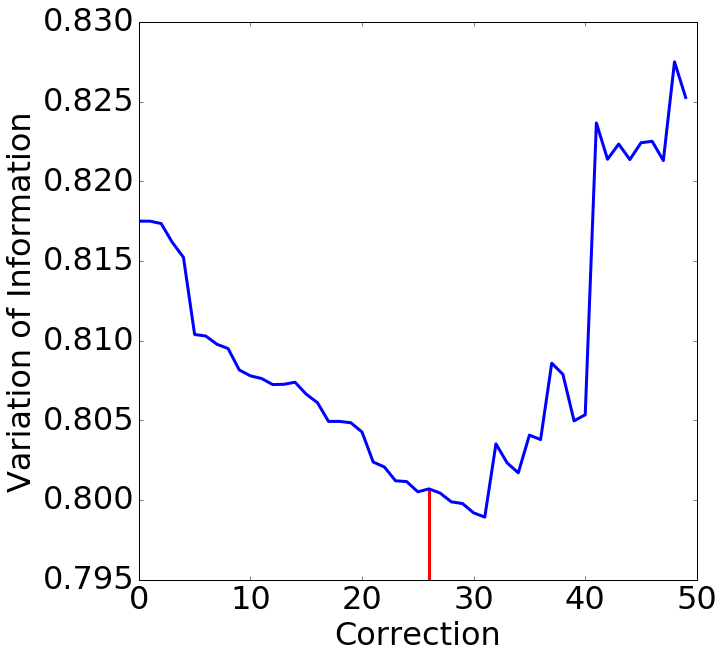

In [57]:
fig = plt.figure(figsize=(10,10))

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 32}

plt.rc('font', **font)
plt.axvline(x=26, ymax=0.16, color='red', linewidth=3)
plt.plot(VIs[0:50], label='Training Loss', linewidth=3)

# plt.plot(valid_losses, label='Validation Loss', linewidth=3)
plt.xlabel('Correction')
plt.ylabel('Variation of Information')
# plt.xlim(40)
ax = plt.gca()
plt.rc('legend',**{'fontsize':28})
# legend = ax.legend(loc='upper right')

plt.savefig('/tmp/pt.pdf')

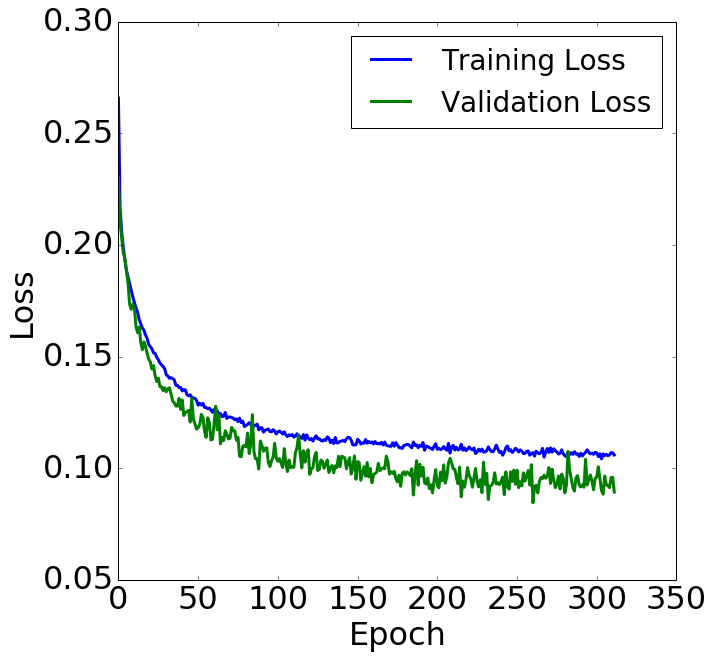

In [21]:
fig = plt.figure(figsize=(10,10))

font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 32}

plt.rc('font', **font)
plt.plot(train_losses, label='Training Loss', linewidth=3)
plt.plot(valid_losses, label='Validation Loss', linewidth=3)
plt.xlabel('Epoch')
plt.ylabel('Loss')
ax = plt.gca()
plt.rc('legend',**{'fontsize':28})
legend = ax.legend(loc='upper right')

plt.savefig('/tmp/valloss.pdf')

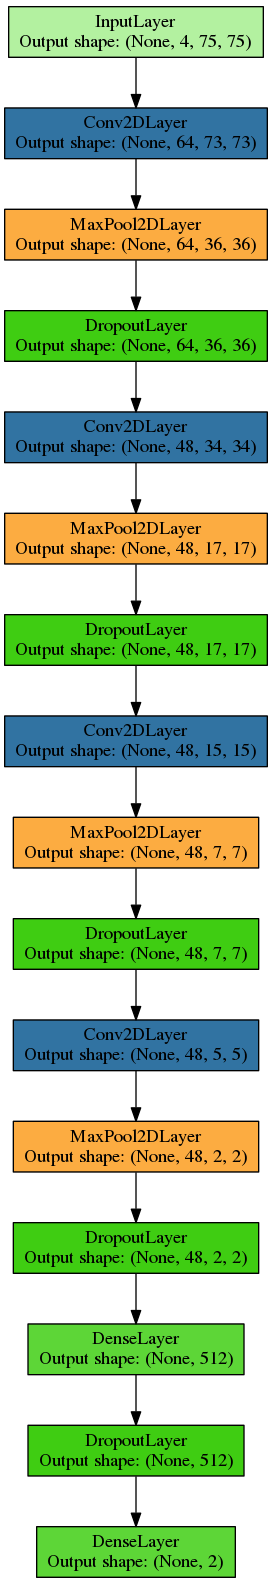

In [5]:
nolearn.lasagne.visualize.draw_to_notebook(net)

In [6]:
X_test, y_test = gp.Patch.load_rgba_test_only('ipmlb')

Loaded /home/d/patches//ipmlb/ in 0.000455141067505 seconds.


In [7]:
len(X_test)

17560

In [8]:
test_prediction = net.predict(X_test)
test_prediction_prob = net.predict_proba(X_test)
print
print 'Precision/Recall:'
print classification_report(y_test, test_prediction)


Precision/Recall:
             precision    recall  f1-score   support

          0       0.96      0.92      0.94      8780
          1       0.92      0.96      0.94      8780

avg / total       0.94      0.94      0.94     17560



In [9]:
test_acc = net.score(X_test, y_test)
acc_score = accuracy_score(y_test, test_prediction)
print 'Test Accuracy:', test_acc
print 'Accuracy Score:', acc_score

Test Accuracy: 0.940432801822
Accuracy Score: 0.940432801822


<module 'matplotlib.pyplot' from '/home/d/nolearn/local/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

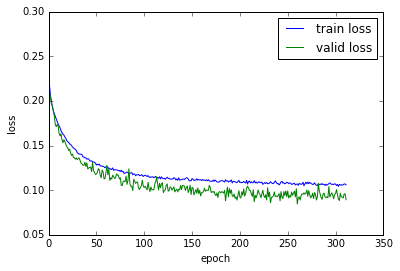

In [10]:
plot_loss(net)

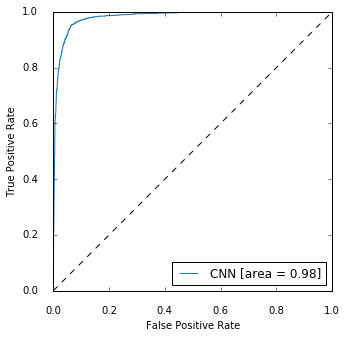

In [11]:
# ROC/AUC
fpr, tpr, _ = roc_curve(y_test, test_prediction_prob[:,1])
roc_auc = auc(fpr, tpr)
data = {}
data['CNN'] = (fpr, tpr, roc_auc)
gp.Legacy.plot_roc(data)

In [12]:
net.uuid = 'IPMLB'

In [17]:
image, prob, gold, rhoana, bb = gp.Legacy.read_dojo_data()

a


In [20]:
gp.Util.threshold(rhoana, 583).max()

0.0

In [48]:
gp.Stats.run_dojo_xp(net)

Loading merge errors from file..
10  merge errors found.
Creating dojo bigM..

Correcting merge errors with p < .05
fixing 1.25392163319e-09
fixing 0.0360888727009
fixing 0.036937456578
fixing 0.00606872793287
fixing 1.77100162091e-06
fixing 0.00174562365282
   Mean VI improvement 0.0056644086815
   Median VI improvement 0.0
Correcting split errors with p > .95
   Mean VI improvement 0.0762771864669
   Median VI improvement 0.0784492934953

Correcting merge errors with p < .05
fixing 1.25392163319e-09
fixing 0.0360888727009
fixing 0.036937456578
fixing 0.00606872793287
fixing 1.77100162091e-06
fixing 0.00174562365282
   Mean VI improvement 0.0056644086815
   Median VI improvement 0.0
Correcting split errors with p > .95
30 minutes done bigM_max= 0.592341065407
60 minutes done bigM_max= 0.00225855107419
   Mean VI improvement -3.04422046034
   Median VI improvement -3.10836300705

Correcting merge errors by simulated user (er=0)
   Mean VI improvement 0.00635579286424
   Median VI impro

In [45]:
gp.Stats.run_cylinder_xp(net)

Original median VI 0.379410649496
Loading merge errors from file..
151  merge errors found.
Creating cylinder bigM..


KeyboardInterrupt: 

In [29]:
image.shape

(10, 474, 474)

In [36]:
# load dojo data
input_image, input_prob, input_gold, input_rhoana, dojo_bbox = gp.Legacy.read_dojo_data()



In [40]:
input_image[0].max()

225

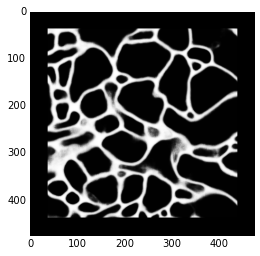

In [38]:
imshow(input_prob[2], cmap='gray')

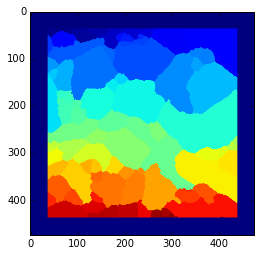

In [41]:
imshow(input_rhoana[0])

In [53]:
import numpy as np
def seg_to_color(slice):
	colors = np.zeros(slice.shape+(3,),dtype=np.uint8)
	colors[:,:,0] = np.mod(107*slice[:,:],700).astype(np.uint8)
	colors[:,:,1] = np.mod(509*slice[:,:],900).astype(np.uint8)
	colors[:,:,2] = np.mod(200*slice[:,:],777).astype(np.uint8)
	return colors

i_r = input_image[0]
rrr = np.zeros((i_r.shape[0], i_r.shape[1], 3), dtype=np.uint8)
for j in range(rrr.shape[0]):
    for i in range(rrr.shape[1]):
        rrr[j,i] = (i_r[j,i], i_r[j,i], i_r[j,i])
    
rrr[input_prob[0] > 220 ] = (0,255,0)

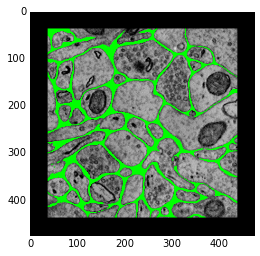

In [57]:
plt.figure()
imshow(rrr)

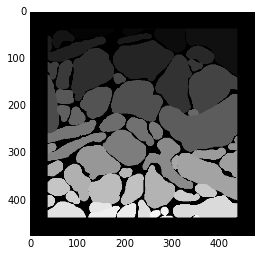

In [55]:
imshow(input_gold[0], cmap='gray')

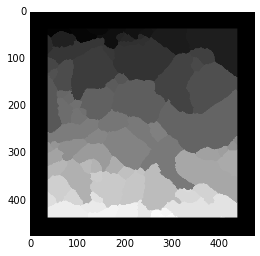

In [56]:
imshow(input_rhoana[0], cmap='gray')

In [62]:
original_mean_VI, original_median_VI, original_VI_s = gp.Legacy.VI(input_gold, input_rhoana)
original_adapted_rand = gp.metrics.adapted_rand(input_rhoana, input_gold)

KeyboardInterrupt: 

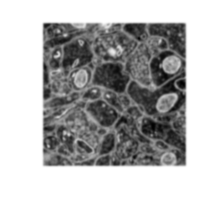

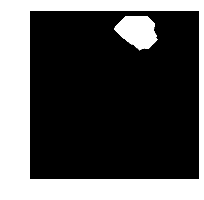

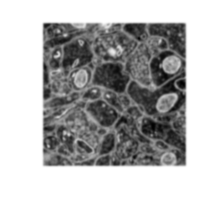

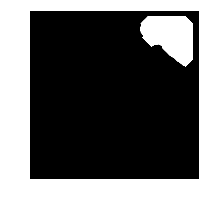

In [64]:
merge_errors = gp.Legacy.get_top5_merge_errors(net, input_image, input_prob, input_rhoana)


In [66]:
first_rand = gp.metrics.adapted_rand(input_rhoana[0], input_gold[0])

In [78]:
net.uuid = 'IPMLB'

In [80]:
M = gp.Legacy.create_bigM_without_mask(net, input_image[0:1], input_prob[0:1], input_rhoana[0:1], verbose=False)

In [85]:
newM, new_rhoana, fixes, new_vi_s = gp.Legacy.splits_global_from_M_automatic(net, M, input_image[0:1], input_prob[0:1], 
                                                                             input_rhoana[0:1], input_gold[0:1], sureness_threshold=.95)

In [87]:
fixes

[(1, 0.99998939037322998),
 (1, 0.99904423952102661),
 (0, 0.99768221378326416),
 (1, 0.99105918407440186),
 (1, 0.98917317390441895),
 (1, 0.97869938611984253),
 (0, 0.97463154792785645),
 (1, 0.96067178249359131),
 (1, 0.96036547422409058)]

In [88]:
gp.metrics.adapted_rand(new_rhoana[0], input_gold[0])

0.067449536773076524

In [89]:
first_rand

0.073737703314086689